# Atividade Prática 3.1 - Uno Cards com YOLO

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 03 de fevereiro de 2024


## Contexto: Detecção de objetos

O problema da detecção de objetos em Visão Computacional refere-se à tarefa de identificar e localizar objetos específicos em imagens ou vídeos. É uma área desafiadora de pesquisa e desenvolvimento, pois envolve superar vários obstáculos, tais como:

1. **Variedade de Objetos e Categorias**: As imagens podem conter uma ampla variedade de objetos, e esses objetos podem pertencer a diferentes categorias. Além disso, um objeto pode aparecer de diferentes maneiras (variações de pose, iluminação, escala, etc.).
2. **Oclusões**: Objetos podem ser parcial ou totalmente ocultos por outros objetos na cena, dificultando a detecção completa.
3. **Variações de Iluminação**: Mudanças na iluminação podem alterar drasticamente a aparência de um objeto, tornando a detecção mais desafiadora.
4. **Escalabilidade**: Os métodos de detecção devem ser eficientes e escaláveis para lidar com grandes conjuntos de dados, como vídeos em tempo real.
5. **Tempo Real**: Em muitos casos, especialmente em aplicações robóticas e sistemas em tempo real, a detecção de objetos deve ocorrer quase instantaneamente.
6. **Precisão e Generalização**: Os sistemas precisam ser capazes de generalizar para diferentes ambientes e condições, mantendo uma alta precisão na detecção.

Para abordar esses desafios, várias técnicas foram desenvolvidas, incluindo o uso de redes neurais convolucionais (CNNs), métodos de transferência de aprendizado e arquiteturas específicas para detecção de objetos, como a YOLO (You Only Look Once) e a SSD (Single Shot Multibox Detector). Essas abordagens têm contribuído significativamente para melhorar a capacidade dos sistemas de visão computacional em detectar objetos de forma eficaz.

## Base de Dados

Disponível em: https://public.roboflow.com/object-detection/uno-cards

### **Instalação de bibliotecas**

1. Mudar o ambiente de execução
1. Instalar a biblioteca `ultralytics`
2. Verificar a corretude da instalação

In [1]:
import ultralytics
import os
ultralytics.checks()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Setup complete ✅ (20 CPUs, 15.4 GB RAM, 66.6/1006.9 GB disk)


## Base de dados

Previamente armazenada no Google Drive em /iaa/uno

### **Qual o padrão YOLO para base de dados?**
O YOLO usa um padrão específico para organizar os dados de entrada e as anotações. Esse padrão é dividido em três pastas:

- **train:** contém as imagens e as anotações que serão usadas para treinar o algoritmo.
- **test:** contém as imagens e as anotações que serão usadas para testar o desempenho do algoritmo.
- **valid:** contém as imagens e as anotações que serão usadas para validar o desempenho do algoritmo.

Cada uma dessas pastas contém duas subpastas:

- **images:** contém as imagens originais.
- **labels:** contém os arquivos de texto com as anotações.

Para conseguir localizar essas pastas, a YOLO utiliza um arquivo `data.yaml`, que contém:
- A localização das pastas `train`, `test` e `valid`.
- Número de classes (`nc`).
- Lista com o nome de cada classe de objetos (problema de classificação)

In [2]:
os.listdir('imgs')

['README.roboflow.txt',
 'README.dataset.txt:Zone.Identifier',
 'test',
 'train',
 'data.yaml',
 'data.yaml:Zone.Identifier',
 'valid',
 'README.roboflow.txt:Zone.Identifier',
 'README.dataset.txt']

### Inspecionando uma imagem da base e seu rótulo




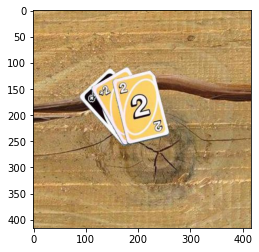

In [3]:
from matplotlib import pyplot as plt

imagem = '000244709_jpg.rf.a229d38b2da3011f011866b6e0d7806c.jpg'
pathImagem = 'imgs/train/images/'
img = plt.imread(pathImagem+imagem)
plt.imshow(img)

In [4]:
img.shape

(416, 416, 3)

In [5]:
label = '000244709_jpg.rf.a229d38b2da3011f011866b6e0d7806c.txt'
pathLabel = 'imgs/train/labels/'
arq = open(pathLabel+label)
classes = arq.read()
print(classes)

2 0.27403846153846156 0.3954326923076923 0.057692307692307696 0.06490384615384616
3 0.32572115384615385 0.36778846153846156 0.06009615384615385 0.057692307692307696
7 0.41225961538461536 0.35336538461538464 0.05048076923076923 0.057692307692307696


In [6]:
boxes = []
for line in classes.split('\n'):
    bbox = []
    for number in line.split(' '):
        bbox.append(float(number))
    boxes.append(bbox)
boxes

[[2.0,
  0.27403846153846156,
  0.3954326923076923,
  0.057692307692307696,
  0.06490384615384616],
 [3.0,
  0.32572115384615385,
  0.36778846153846156,
  0.06009615384615385,
  0.057692307692307696],
 [7.0,
  0.41225961538461536,
  0.35336538461538464,
  0.05048076923076923,
  0.057692307692307696]]

In [7]:
! pip install pybboxes

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import pybboxes as pbx
retangulos = []
for bbox in boxes:
    retangulos.append(pbx.convert_bbox(bbox[1:], from_type="yolo", to_type="voc", image_size=(416,416)))

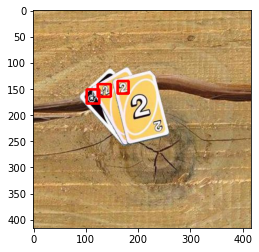

In [9]:
import cv2

img = plt.imread(pathImagem+imagem)
for retangulo in retangulos:
    cv2.rectangle(img, retangulo[:2], retangulo[2:], (255,0,), 3)
plt.imshow(img)

## Treinando um modelo YOLOv8


- Carregar um modelo pré-treinando
  - Arquitetura já definida
  - Pesos oriundos do MS COCO
- Transferência de Aprendizado

In [10]:
from ultralytics import YOLO

modelo = YOLO('yolov8n.pt')

### **Argumentos**

* **`data`** que recebe o caminho do arquivo **`.yaml`** que possui as classes e informações do dataset utilizado;
* **`epochs`** que se refere a quantidade de épocas que serão necessárias para o treinamento.

In [25]:
modelo.train(data = 'imgs/data.yaml', epochs = 2, plots = True)

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=imgs/data.yaml, epochs=2, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 1.83MB/s]
2024-02-03 10:43:05.720976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 10:43:05.721055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 10:43:05.747695: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /home/aurelio/Projetos/ia-aplicada-uea/unocards/imgs/datasets/train/labels... 6295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6295/6295 [00:04<00:00, 1445.04it/s]


train: New cache created: /home/aurelio/Projetos/ia-aplicada-uea/unocards/imgs/datasets/train/labels.cache


val: Scanning /home/aurelio/Projetos/ia-aplicada-uea/unocards/imgs/datasets/train/labels.cache... 6295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6295/6295 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train15
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      2.34G      1.159      2.839     0.9934         26        640: 100%|██████████| 394/394 [00:51<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:30<00:00,  6.36it/s]


                   all       6295      18885       0.92      0.914      0.973      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      2.12G     0.8155      1.187     0.8803         28        640: 100%|██████████| 394/394 [00:46<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:31<00:00,  6.22it/s]


                   all       6295      18885      0.985      0.985      0.991      0.831

2 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 6.3MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:36<00:00,  5.46it/s]


                   all       6295      18885      0.985      0.985      0.991      0.831
                     0       6295       1255      0.998      0.992      0.995      0.876
                     1       6295       1220      0.981      0.998      0.995      0.857
                    10       6295       1289      0.987      0.997      0.994      0.745
                    11       6295       1313      0.997      0.981      0.994      0.804
                    12       6295       1220      0.993      0.995      0.995      0.843
                    13       6295       1322      0.957      0.957      0.948      0.646
                    14       6295       1208          1      0.999      0.995      0.812
                     2       6295       1241      0.998      0.982      0.995      0.868
                     3       6295       1210       0.97       0.99      0.994      0.864
                     4       6295       1267      0.998      0.989      0.995      0.838
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f490cae2350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

### **Avaliação de desempenho**

Para avaliar o desempenho de um modelo YOLO, é necessário usar um conjunto de dados de imagens ou vídeos que não foram usados para treinar o modelo. Esse conjunto de dados é conhecido como **conjunto de dados de teste**.

A cada vez que executamos um comando de `train` ou `val`, a YOLO nos gera automaticamente os gráficos e projeções necessários para avaliar seu desempenho.

- **runs/detect/train**: Pasta onde a YOLO salva seus gráficos e ilustrações de treino;
- **runs/detect/val**: Pasta onde a YOLO salva seus gráficos e ilustrações de validação;
- **runs/detect/predict**: Pasta onde a YOLO salva suas inferências sobre imagens externas;

### **Matriz de confusão**
A matriz de confusão nos permite avaliar o desempenho do modelo comparando as classes previstas pelo modelo com as classes reais. Isso é, a resposta
*versus* o gabarito. Visualmente, quanto mais a diagonal principal se destacar, melhor o modelo.

# **Passo 5: Utilizando o Modelo em Imagens Novas**
**Inferência**

Vá no Google e pesquise uma imagem de cartas Uno. Pegue o link da imagem e substitua dentro de **`source="<link da sua imagem>".`**

O objetivo final de treinar um modelo é implantá-lo em aplicações do mundo real. O modo de exportação no Ultralytics YOLOv8 oferece uma gama versátil de opções para exportar seu modelo treinado para diferentes formatos, tornando-o aplicável em várias plataformas e dispositivos.


Exporte um modelo YOLOv8 para qualquer formato suportado abaixo com o argumento `format`, ou seja, `format=onnx`. Consulte [YOLOv8 - Export Docs](https://docs.ultralytics.com/modes/export/) para obter mais informações.


| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)             | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`                                     |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlmodel`         | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`                                    |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`                                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [ncnn](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |

Dentro de *`format`* você coloca o formato desejável. É comum que esses modelos fiquem disponíveis em um servidor que recebe imagens e devolve as imagens com as caixas delimitadoras. Lembre-se que um vídeo é composto de *frames*, que são imagens. Então, você pode "embarcar" esse modelo em uma câmera, por exemplo.